In [569]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
import seaborn as sns 
%matplotlib inline
start_i = '2017-01-01'

ibov = yf.download('BOVA11.SA', start=start_i)
vale = yf.download('VALE3.SA', start=start_i)
b3sa = yf.download('B3SA3.SA', start=start_i)
itub = yf.download('ITUB4.SA', start=start_i)

tickers_py = [ibov, vale, b3sa, itub]

for i in tickers_py:
    i.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [570]:
ibov.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
874,2020-07-14,95.099998,96.870003,94.620003,96.599998,96.599998,9503620
875,2020-07-15,97.699997,98.339996,96.930000,98.029999,98.029999,13982380
876,2020-07-16,97.550003,97.800003,96.459999,96.820000,96.820000,6110460
877,2020-07-17,97.419998,99.250000,97.419998,99.129997,99.129997,5621400
878,2020-07-20,99.120003,100.599998,98.879997,100.500000,100.500000,8563550
879,2020-07-21,101.230003,101.360001,99.849998,100.290001,100.290001,5261760
880,2020-07-22,100.570000,101.150002,99.389999,100.379997,100.379997,6524500
881,2020-07-23,100.379997,101.059998,98.269997,98.400002,98.400002,7849280
882,2020-07-24,98.300003,98.930000,97.089996,98.589996,98.589996,9457090
883,2020-07-27,98.930000,100.730003,98.849998,100.459999,100.459999,7766510


- iShares Ibovespa Fundo de Índice (BOVA11)

- (1) - VALE3 (10.26%)
- (2) - B3SA3 (7.11%)
- (3) - ITUB4 (6.67%)

- = 24.04 % (24/07/2020)



In [571]:
# Creating Series:

# iShares Ibovespa (BOVA11.SA): 

date_ibov = ibov.loc[:, 'Date']
open_ibov = ibov.loc[:, 'Open']
open_ibov_0 = open_ibov[0]
open_ibov_norm = open_ibov/open_ibov_0

# Vale S.A. (VALE):

date_vale = vale.loc[:, 'Date']
open_vale = vale.loc[:, 'Open']
open_vale_0 = open_vale[0]
open_vale_norm = open_vale/open_vale_0

# Brasil, Bolsa, Balcão (B3SA3.SA):

date_b3sa = b3sa.loc[:, 'Date']
open_b3sa = b3sa.loc[:, 'Open']
open_b3sa_0 = open_b3sa[0]
open_b3sa_norm = open_b3sa/open_b3sa_0

# Itau Unibanco Holding S.A. (ITUB4.SA): 

date_itub = itub.loc[:, 'Date']
open_itub = itub.loc[:, 'Open']
open_itub_0 = open_itub[0]
open_itub_norm = open_itub/open_itub_0

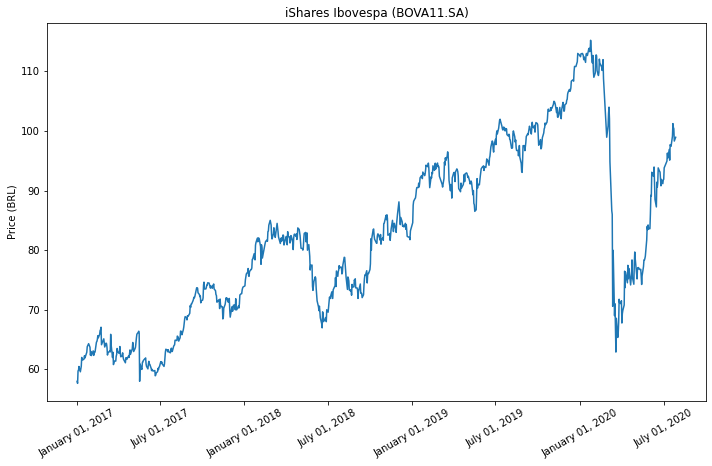

In [572]:
# Plotting iShares Ibovespa (BOVA11.SA): 

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(date_ibov, open_ibov)

plt.ylabel('Price (BRL)')
plt.title('iShares Ibovespa (BOVA11.SA)')

plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

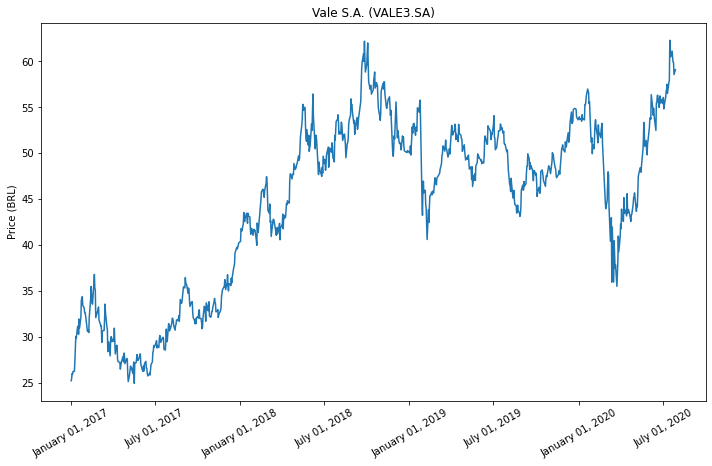

In [573]:
# Plotting : 

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(date_vale, open_vale)
plt.title('Vale S.A. (VALE3.SA)')
plt.ylabel('Price (BRL)')

plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.show()

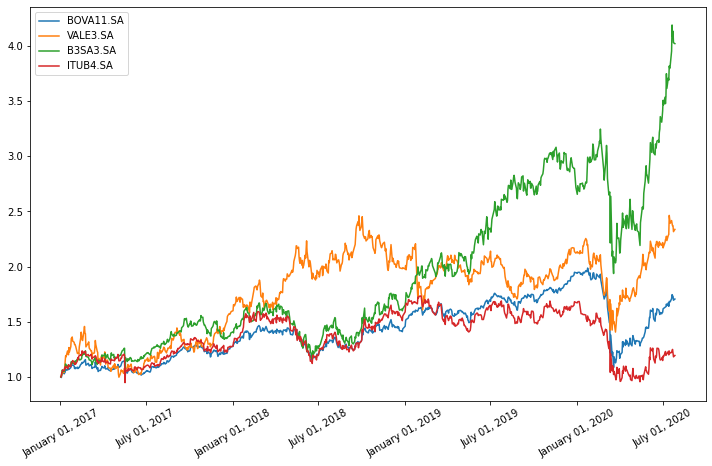

In [574]:
# Normalized comparison

plt.figure(figsize=(10, 6))
format = mpl_dates.DateFormatter('%B %d, %Y')
plt.gca().xaxis.set_major_formatter(format)

plt.plot(date_ibov, open_ibov_norm, label='BOVA11.SA')
plt.plot(date_vale, open_vale_norm, label='VALE3.SA')
plt.plot(date_b3sa, open_b3sa_norm, label='B3SA3.SA')
plt.plot(date_itub, open_itub_norm, label='ITUB4.SA')

plt.tight_layout()
plt.tick_params(axis='x', rotation=30)
plt.legend()
plt.show()

In [575]:
# Creating DataFrame with normalized prices: 

df_main = pd.DataFrame({'BOVA11.SA': open_ibov_norm,
                         'VALE3.SA': open_vale_norm,
                         'B3SA3.SA': open_b3sa_norm,
                         'ITUB4.SA': open_itub_norm})

df_main.head()

,BOVA11.SA,VALE3.SA,B3SA3.SA,ITUB4.SA
0,1.000000,1.000000,1.000000,1.000000
1,0.994137,1.009098,1.005535,1.011659
2,1.030178,1.030854,1.039360,1.040359
3,1.032074,1.027690,1.062731,1.049027
4,1.042938,1.039953,1.049200,1.062480


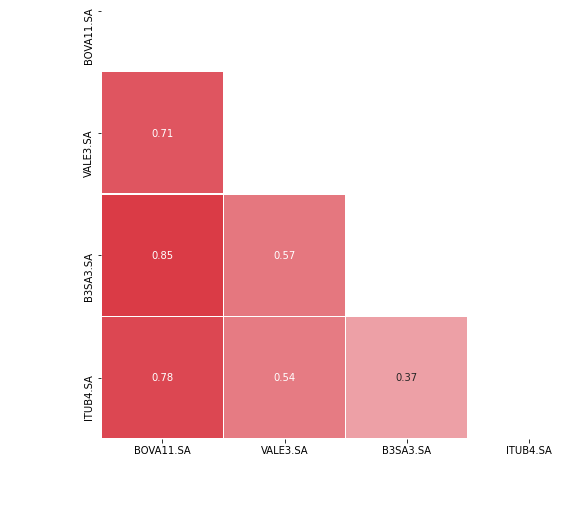

In [576]:
# Create correlation matrix: 

correl = df_main.corr()

# Create Mask for upper triangle: 

mask = np.triu(np.ones_like(correl, dtype=np.bool))

# Set Matplotlib Figure: 

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap: 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask with the correct aspect ratio:

sns.heatmap(correl, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True )

plt.show()